In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fin_data = pd.read_csv("~/fin.csv")
fin_data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


### EDA

In [3]:
# to view the data properties and descriptive statistics
fin_data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [4]:
# check the data types and data information
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
# to keep an original copy of our data in case we make changes to it

fin_data_orig = fin_data.copy()

In [6]:
# the shape of our data: 10000 observations with 5 features
fin_data.shape

(10000, 5)

In [7]:
#check the ratio of those that defaulted to those that didnt
fin_data['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [8]:
#in percentages, by normalization
fin_data['Defaulted?'].value_counts(normalize = True)

0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

* we see here that about 97% of those who got the loan didn't default and only a 3% of borrowers defaulted.

In [9]:
#average customer salary
fin_data['Annual Salary'].mean()

402203.782224

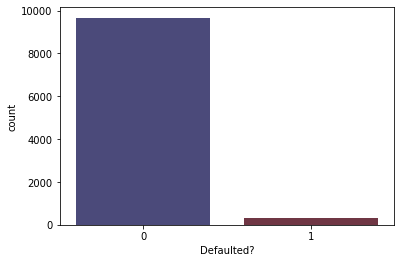

In [10]:
#visualizing the defaulters in a countplot
sns.countplot(x = "Defaulted?", data = fin_data, palette ='icefire');

1    0.7056
0    0.2944
Name: Employed, dtype: float64


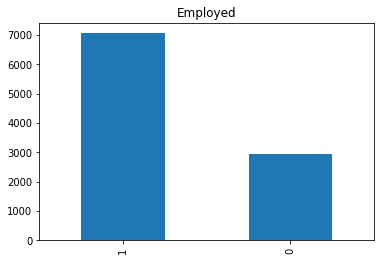

In [11]:
# The Employed column, check the ratio of those that are to those that aren't and visualize 
employed = fin_data['Employed'].value_counts(normalize = True)
print(employed)

fin_data["Employed"].value_counts().plot.bar(title = 'Employed');

* About 71% of the customers are employed and 29% aren't.
* This lead me to the assumption that majority of those that don't default are employed and a majority of those that default aren't employed

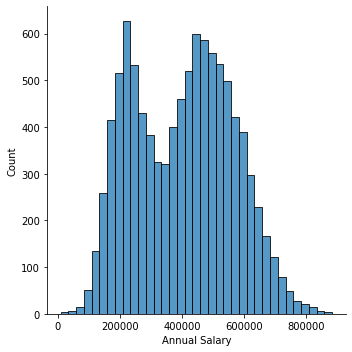

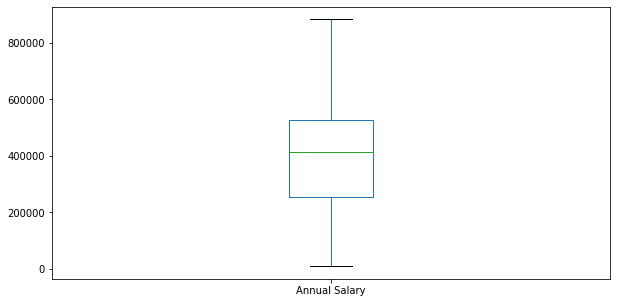

In [12]:
# working on the annual salary column
sns.displot(fin_data['Annual Salary'])
plt.show();
fin_data['Annual Salary'].plot.box(figsize = (10, 5))
plt.show();

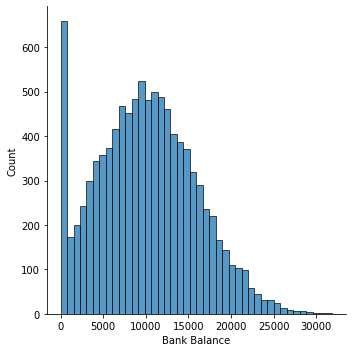

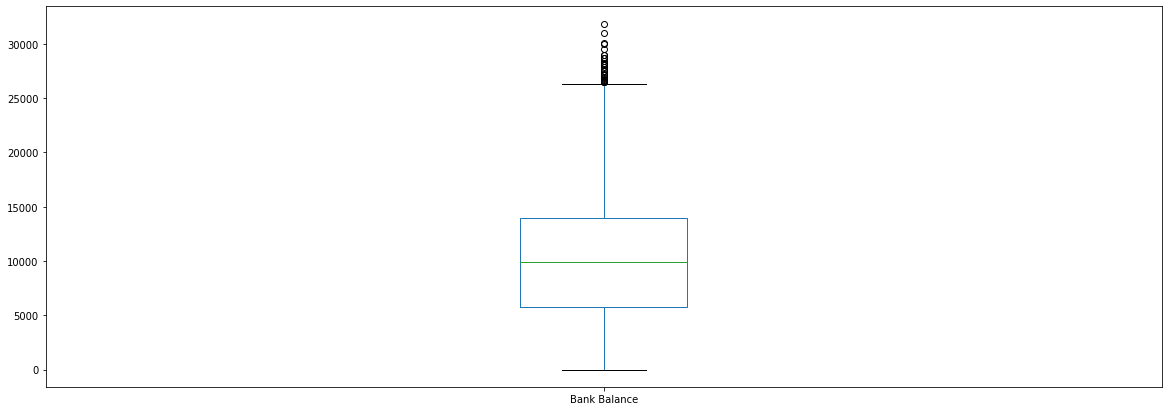

In [13]:
# visualizing Bank balance 

sns.displot(fin_data['Bank Balance'])
plt.show();
fin_data['Bank Balance'].plot.box(figsize = (20, 7))
plt.show();

* The annual salary data doesn't have outliers and is an almost normal distribution which will be good for our algorithms to work on.
* Bank balance is a normal distribution but has outliers above 25000...In the bar plot there is a stand out bar of those with a balance of 0.
* My deduction: The bank balance may have the least influence on whether a customer will default on paying pack the loan

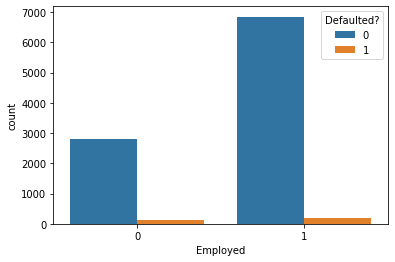

In [14]:
# the Employed data variable vs the target (defaulted) variable
sns.countplot(x = "Employed", data = fin_data, hue=fin_data["Defaulted?"]);

* this shows that we have customers that defaulted, employed and unemployed

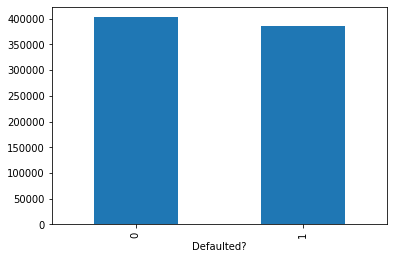

In [16]:
#mean income of those that didn't default vs those that defaulted
fin_data.groupby('Defaulted?')['Annual Salary'].mean().plot.bar();

* There isn't much change in the mean income between those that defaulted and those that didn't

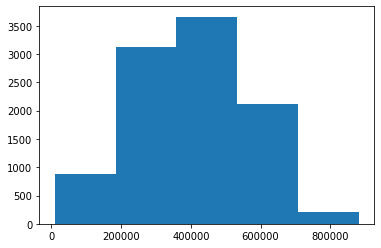

In [17]:
#visualizing the annual salary for each customer

plt.hist(fin_data["Annual Salary"], bins= 5);

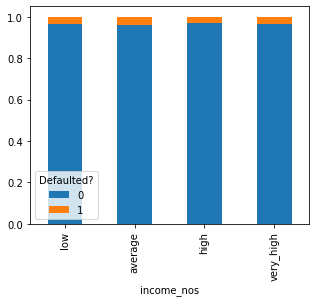

In [18]:
# relationship between annual salary and defaulted
bins = (0, 200000, 400000, 600000, 800000)
group =["low", 'average', 'high', 'very_high']
fin_data["income_nos"] = pd.cut(fin_data['Annual Salary'], bins, labels= group)

income = pd.crosstab(fin_data["income_nos"], fin_data["Defaulted?"])
income.div(income.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize = (5,4));

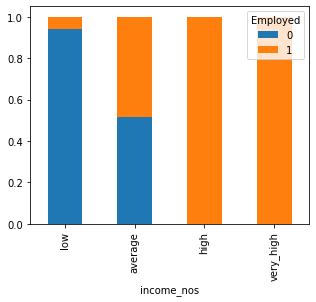

In [19]:
# relationship between annual salary and employment
income = pd.crosstab(fin_data["income_nos"], fin_data["Employed"])
income.div(income.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize = (5,4));

* Interestingly, there are customers that are registered as unemployed but still earn up to the average income and some customers that are employed but earn a really really low salary
* Also while earning is a huge contribution to not defaulting on the loan, it's not a guarantee because we still have some customers who earn **very high** but default on paying pack the loan

In [20]:
fin_data.drop("income_nos", axis = 1, inplace = True)

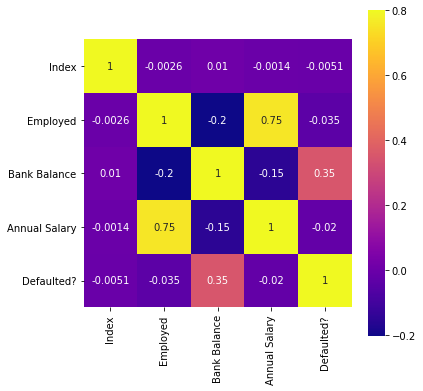

In [21]:
matrix = fin_data.corr()
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(matrix, vmax=.8, square = True, cmap = "plasma", annot = True);

* This confirms that Bank balance has the least correlation with defaluting on the bank loan and those with an annual salary defaulted the least.

### Preprocessing

In [22]:
# change col names
fin_data.rename(columns = {'Index': 'index', 'Employed':'employed', 
                                      'Bank Balance': 'bank_bal', 
                                      'Annual Salary':'annual_salary', 
                                      'Defaulted?': 'defaulted'}, inplace = True)

In [23]:
fin_data.head()

,index,employed,bank_bal,annual_salary,defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


* we have our correct data types and we have seen the relationship between the target column and the other features, let's drop the redundant Index column, save our 'defaulted' target column in a different file and make predictions

In [24]:
fin_data.drop("index", axis = 1, inplace = True)

In [25]:
fin_data.head()

,employed,bank_bal,annual_salary,defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [26]:
X = fin_data.drop('defaulted', 1)
y = fin_data.defaulted

To predict whether or not a customer will default, we'll take into consideration the features: 'annual salary' and 'employed' to predict the target column "defaulted"

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
pred_ = lr.predict(X_test)

In [31]:
accuracy_score(y_test, pred_)

0.9676

In [32]:
precision_score(y_test, pred_, average = 'weighted')

/home/bee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.93624976

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
RFC_pred = model.predict(X_test)

In [36]:
RFC_accuracy = accuracy_score(y_test, RFC_pred)
print('RandomForestClassifier accuracy:', RFC_accuracy)

RandomForestClassifier accuracy: 0.9696


In [37]:
y_test.shape

(2500,)